# Credit Card Users Churn Prediction
## Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

**You need to identify best possible model that will give the required performance**


## Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


#### What Is a Revolving Balance?

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


#### What is the Average Open to buy?

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### What is the Average utilization Ratio?

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


#### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
churn = pd.read_csv("BankChurners.csv")
churn.shape

(10127, 21)

### Data Overview

In [3]:
df = churn.copy()
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


#### Observations:
* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [7]:
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [8]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in column are: ")
    print(df[i].value_counts())
    print('-'*50)

Unique values in column are: 
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
Unique values in column are: 
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Unique values in column are: 
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Unique values in column are: 
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Unique values in column are: 
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Unique values in column are: 
Blu

**Observations**
* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k 
* Most customers have a blue card.

**Missing values**
* 'abc' value of Income_Category can be considered and treated as missing values.

### Data Preprocessing

In [9]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [11]:
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

### EDA

#### Univariate Analysis

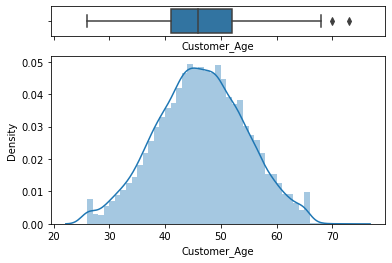

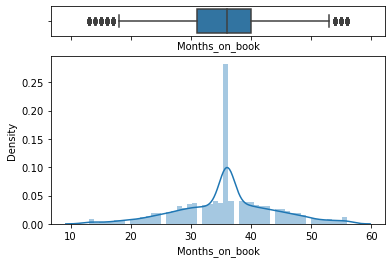

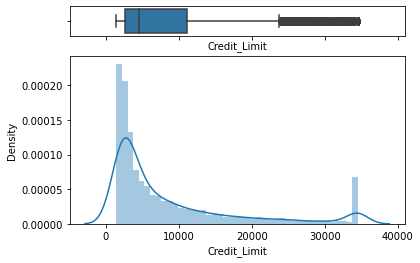

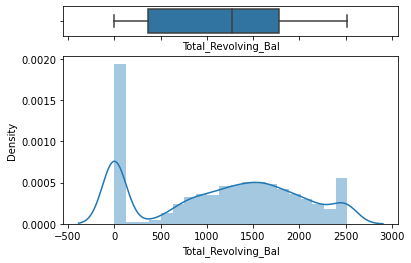

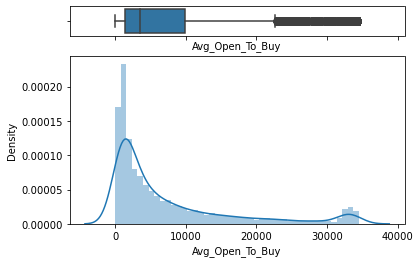

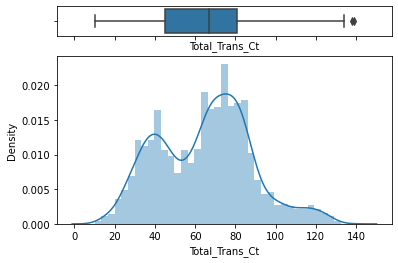

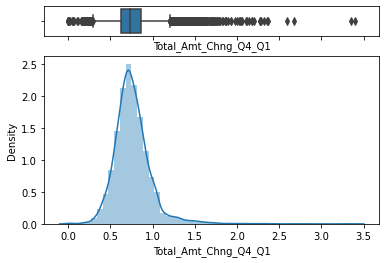

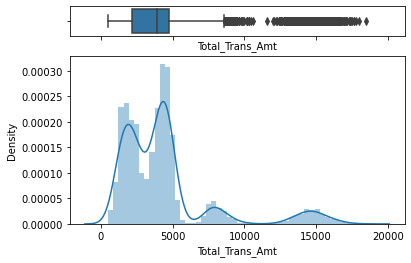

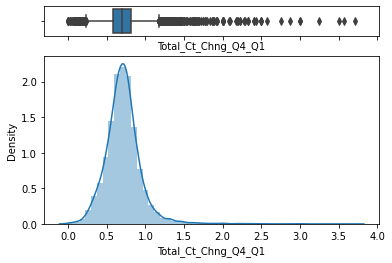

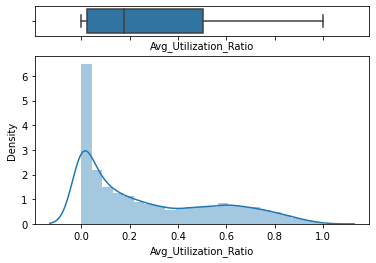

In [12]:
df_num = df[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
for col in df_num.columns:
    f, (ax_box, ax_dis) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
    sns.boxplot(df_num[col], ax=ax_box)
    sns.distplot(df_num[col], ax=ax_dis)
    plt.show()

**Credit limit, Average open to buy and Average utilization ratio are right-skewed**

1. Open to buy means how much credit a customer is left with
   * Low values of Open to buy could represent either
       * Customers have low credit limits
       * Customers are spending a lot so they are left less open to buy
       

2. Average utilization ratio = (1 - (open to buy/credit limit))
   * Low values of the Average utilization ratio represents
        * (Open to buy/credit limit) is nearly equal to 1 -> Open to buy is nearly equal to the credit limit -> customers are spending less using their credit cards

3. Credit limit is also right-skewed which represents - most of the customers have low credit limits
 

Looking at the 3 variables, we can conclude that most of the customers have low credit limits and are not utilizing their credit cards much

Now this statement justifies the right skewness for all 3 variables

### Bivariate Analysis

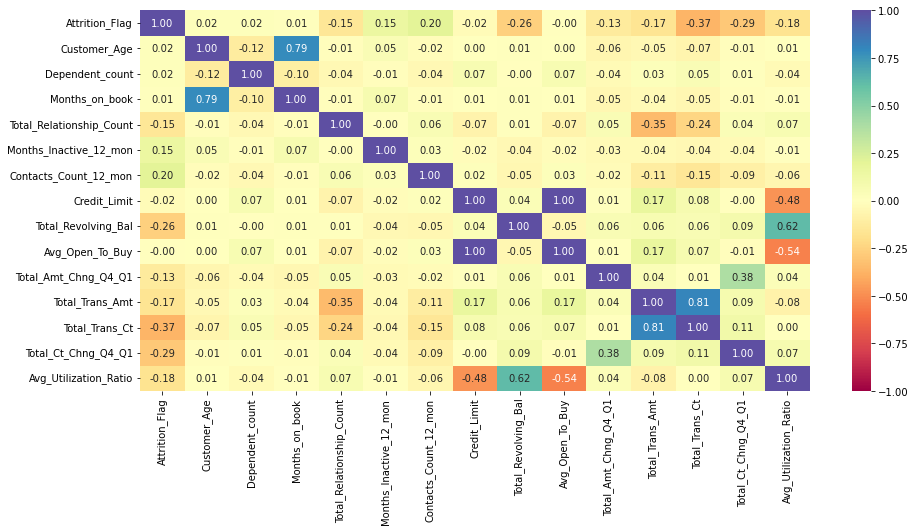

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
* There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

In [14]:
new_cols= ['Gender','Marital_Status','Education_Level','Income_Category','Card_Category','Contacts_Count_12_mon', 'Months_Inactive_12_mon',
            'Total_Relationship_Count','Dependent_count']

### Attrition Flag vs Gender

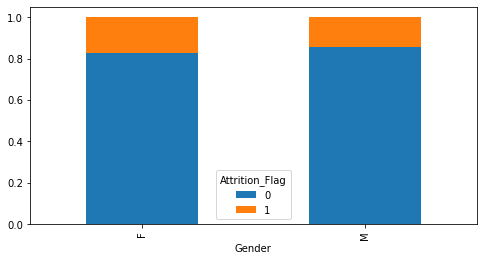

In [15]:
pd.crosstab(df["Gender"], df["Attrition_Flag"], normalize="index").plot(kind="bar", stacked=True, figsize=(8,4))
plt.show()

* There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

### Attrition Flag vs Marital Status

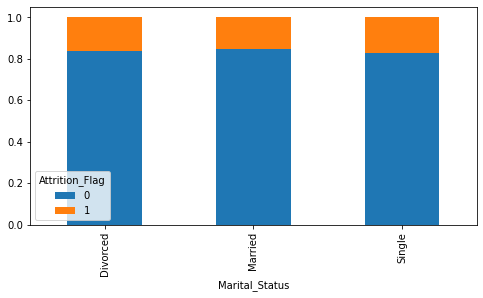

In [16]:
pd.crosstab(df["Marital_Status"], df["Attrition_Flag"], normalize="index").plot(kind="bar", stacked=True, figsize=(8,4))
plt.show()

* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

### Attrition Flag vs Education Level

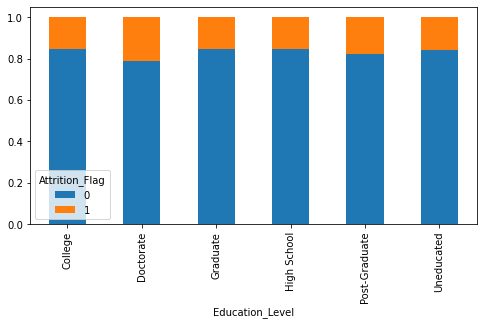

In [17]:
pd.crosstab(df["Education_Level"], df["Attrition_Flag"], normalize="index").plot(kind="bar", stacked=True, figsize=(8,4))
plt.show()

* Customers with higher education -  Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

### Attrition Flag vs Income Category

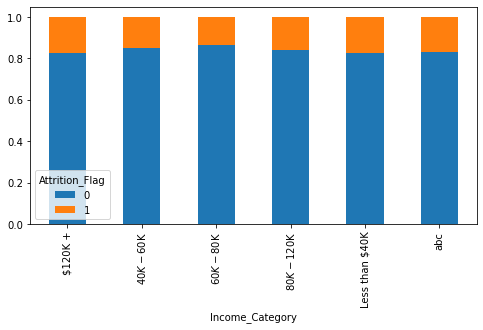

In [18]:
pd.crosstab(df["Income_Category"], df["Attrition_Flag"], normalize="index").plot(kind="bar",stacked=True, figsize=(8,4))
plt.show()

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Attrition Flag vs Card Category

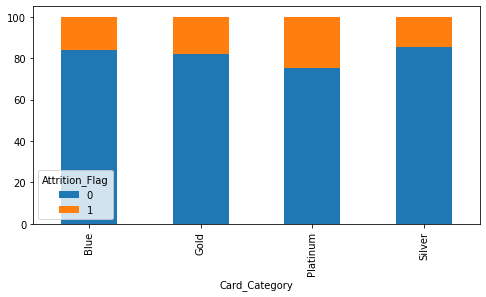

In [19]:
(pd.crosstab(df["Card_Category"],df["Attrition_Flag"],normalize="index")*100).plot(kind="bar",stacked=True,figsize=(8,4))
plt.show()

* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### Attrition Flag vs Contacts count 12 mon

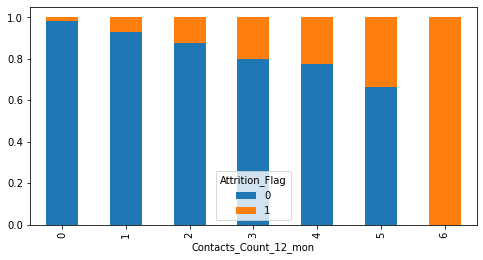

In [20]:
pd.crosstab(df["Contacts_Count_12_mon"],df["Attrition_Flag"],normalize="index").plot(kind="bar",stacked=True, figsize=(8,4))
plt.show()

* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### Attrition Flag vs Months_Inactive_12_mon

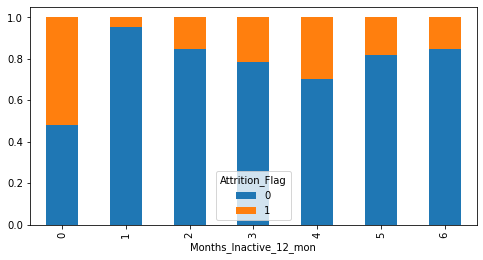

In [21]:
pd.crosstab(df["Months_Inactive_12_mon"],df["Attrition_Flag"],normalize="index").plot(kind="bar",stacked=True,figsize=(8,4))
plt.show()

* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### Attrition Flag vs Total Relationship Count

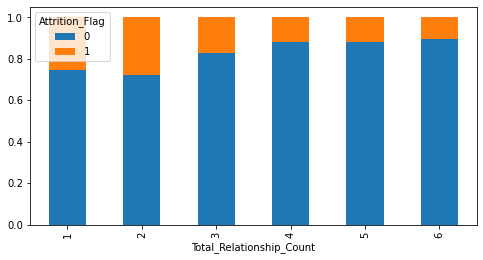

In [22]:
pd.crosstab(df["Total_Relationship_Count"],df["Attrition_Flag"],normalize="index").plot(kind="bar",stacked=True,figsize=(8,4))
plt.show()

* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### Attrition Flag vs Dependent Count

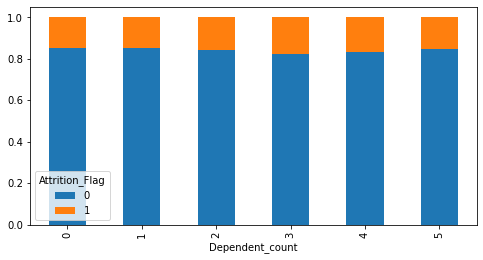

In [23]:
pd.crosstab(df["Dependent_count"],df["Attrition_Flag"],normalize="index").plot(kind="bar",stacked=True,figsize=(8,4))
plt.show()

* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

### Percentage of outliers in each column

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q1 - Q3
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR 
((df.select_dtypes(include=["float64","int64"]) < lower) | (df.select_dtypes(include=["float64","int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag               16.065962
Customer_Age                100.000000
Dependent_count             100.000000
Months_on_book              100.000000
Total_Relationship_Count    100.000000
Months_Inactive_12_mon      100.000000
Contacts_Count_12_mon       100.000000
Credit_Limit                100.000000
Total_Revolving_Bal         100.000000
Avg_Open_To_Buy             100.000000
Total_Amt_Chng_Q4_Q1        100.000000
Total_Trans_Amt             100.000000
Total_Trans_Ct              100.000000
Total_Ct_Chng_Q4_Q1         100.000000
Avg_Utilization_Ratio       100.000000
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### Missing values imputation

- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [25]:
df1 = df.copy()
df1["Income_Category"].replace("abc", np.nan, inplace=True)
df1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [26]:
imputer = SimpleImputer(strategy="most_frequent")

In [27]:
x = df1.drop(["Attrition_Flag"],axis=1)
y = df1["Attrition_Flag"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)

In [29]:
reqd_col_for_impute = ["Education_Level","Income_Category","Marital_Status"]

In [30]:
x_train[reqd_col_for_impute] = imputer.fit_transform(x_train[reqd_col_for_impute])
x_test[reqd_col_for_impute] = imputer.transform(x_test[reqd_col_for_impute])

In [31]:
print(x_train.isna().sum())
print("-"*50)
print(x_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
--------------------------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_

* All missing values have been treated.

### Encoding Categorical Variables

In [32]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
print(x_train.shape, x_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

### Model Building

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [33]:
def metrics_score(actual, predicted):
    print(metrics.classification_report(actual, predicted))
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Not Attrite","Attrite"], yticklabels=["Not Attrite","Attrite"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying  the customers who are at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a customer would not attrite and the customer does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that a customer would attrite but the customer does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that a customer would not attrite but the customer attrites

* True Positive (Actual=1, Predicted=1): Model predicts that a customer would attrite and the customer actually attrites

In [34]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088



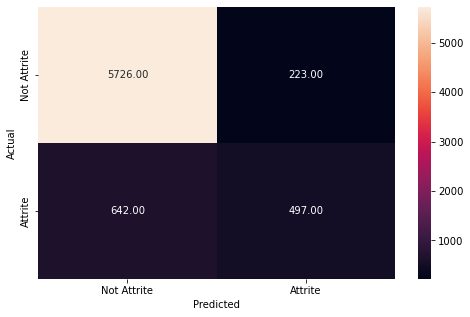

In [35]:
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039



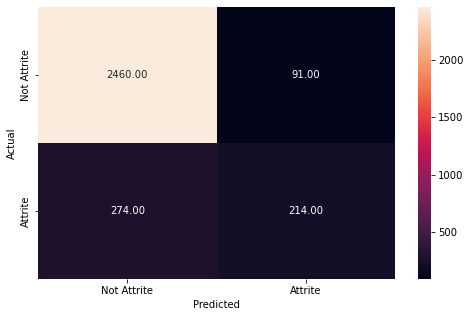

In [36]:
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 90%** on train and test dataset.
- However, **the recall for this model is only around 44% for class 1 on train and test dataset.**
- As the recall is low, **this model will not perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of customers who will attire.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [37]:
cols=x_train.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)

,0
Contacts_Count_12_mon,0.315314
Months_Inactive_12_mon,0.249193
Dependent_count,0.200022
Customer_Age,0.117554
Income_Category_Less than $40K,0.052689
Marital_Status_Single,0.045791
Education_Level_Graduate,0.010850
Education_Level_Post-Graduate,0.008704
Education_Level_Doctorate,0.007366
Education_Level_Uneducated,0.004554


**Observations:**


**Features which positively affect on the attrition rate are:**
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Dependent_count
- Customer_Age
- Income_Category_Less than $40K	
- Education_Level_Graduate	
- Education_Level_Post-Graduate
- Education_Level_Doctorate
- Avg_Utilization_Ratio

**Features which negatively affect on the attrition rate are:**
- Total_Relationship_Count	
- Total_Trans_Ct
- Months_on_book
- Total_Ct_Chng_Q4_Q1
- Marital_Status_Married
- Income_Category_ 60𝐾− 80K
- Total_Amt_Chng_Q4_Q1


**Observations:**

- Based on the Logistic Regression model, **Contacts_Count_12_mon is the most important feature** in detecting whether an customer would attrite or not.So, highest attrition is among the customers who interacted the most with the bank.
This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
- **This model also suggests that attrition is dependent on the customers's activity.** As inactivity increases attrition also increases.
- **Dependent_count is an important variable in predicting the attrition rate.** As more the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
- Education level of customers also have some interesting outcome.Customers with higher education - Doctorates and Post Graduates are the ones most attriting.
- *The customers belonging to the income group - Earning less than 40K are the ones attriting the most.
- Other features which appear to affect the chances of attrition are Maritial Status,Avg Utilization ratio.

- The model also captures the **inverse relation between Total_Relationship_Count and attrition** - suggesting customer who uses more number of products from the bank are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.
-  **Customers who are doing more transactions with the bank have lower chance of attrition**, a conclusion that makes sense since Less number of transactions lead to higher attrition.
- From Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 it's clear that Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [38]:
odds = np.exp(lg.coef_[0])
pd.DataFrame(odds, x_train.columns, columns=["odds"]).sort_values(by=["odds"],ascending=False)

,odds
Contacts_Count_12_mon,1.370689
Months_Inactive_12_mon,1.282990
Dependent_count,1.221429
Customer_Age,1.124742
Income_Category_Less than $40K,1.054102
Marital_Status_Single,1.046855
Education_Level_Graduate,1.010909
Education_Level_Post-Graduate,1.008742
Education_Level_Doctorate,1.007393
Education_Level_Uneducated,1.004564


**Observations**
- The odds of a customers contacting with the bank more to attrite are **1.3 times** the odds of one who is not, probably due to the fact that the bank is not able to resolve the problems faced by customers leading to attrition.
- The odds of a customer being inactive to attrite are **1.2 times** the odds of a customer who is actively in touch with bank.
- The odds of a customer with more dependent attriting are **1.2 times** the odds of a customer with less or no dependent.

**Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

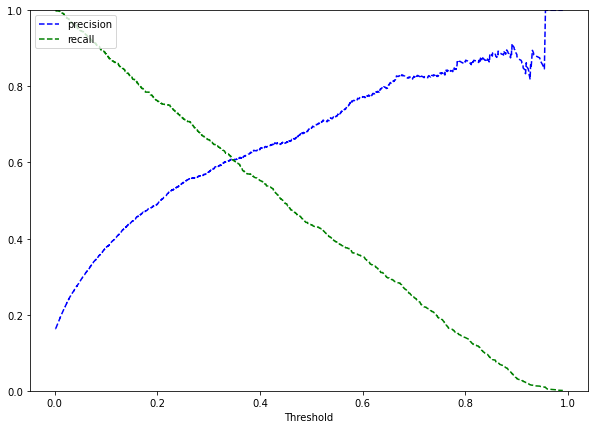

In [39]:
y_scores_lg = lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = metrics.precision_recall_curve(y_train, y_scores_lg[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], "b--", label="precision")
plt.plot(thresholds_lg, recalls_lg[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [40]:
# calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i] == recalls_lg[i]:
        print(thresholds_lg[i])

0.34807441128355476


**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5949
           1       0.61      0.60      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.76      0.77      7088
weighted avg       0.87      0.87      0.87      7088



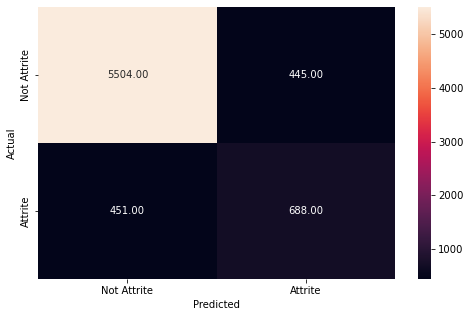

In [41]:
optimal_threshold = .35
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations**
- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039



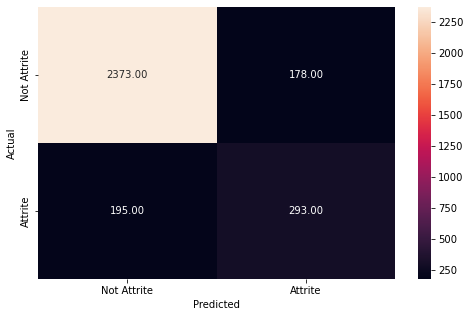

In [42]:
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observation:**
- The model is giving **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms.

### Building SVM

In [43]:
# to speed-up svc
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [44]:
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5949
           1       0.80      0.58      0.67      1139

    accuracy                           0.91      7088
   macro avg       0.86      0.77      0.81      7088
weighted avg       0.90      0.91      0.90      7088



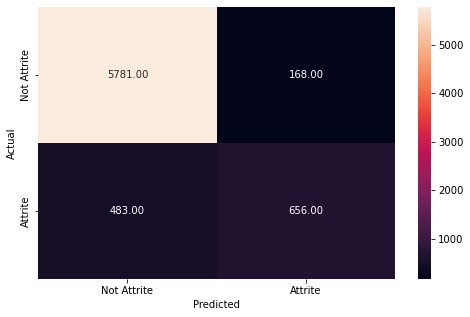

In [45]:
y_pred_train_svm = svm.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2551
           1       0.78      0.56      0.65       488

    accuracy                           0.90      3039
   macro avg       0.85      0.76      0.80      3039
weighted avg       0.90      0.90      0.90      3039



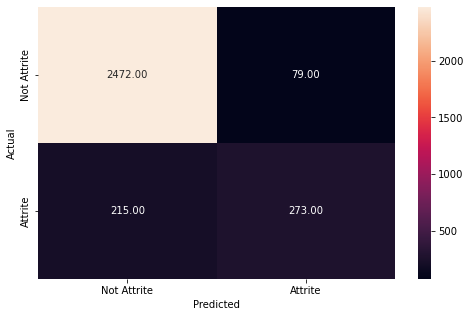

In [46]:
y_pred_test_svm = svm.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

* SVM model with rbf linear is not overfitting as the accuracy is around 90% for both train and test dataset.
* Recall of class 1 for the model is only around 55% which implies our model will not correctly predict the customers who are likely to attrite. 
* The precision is quite good and the model will help to find true positive and will save the cost and energy of the bank.

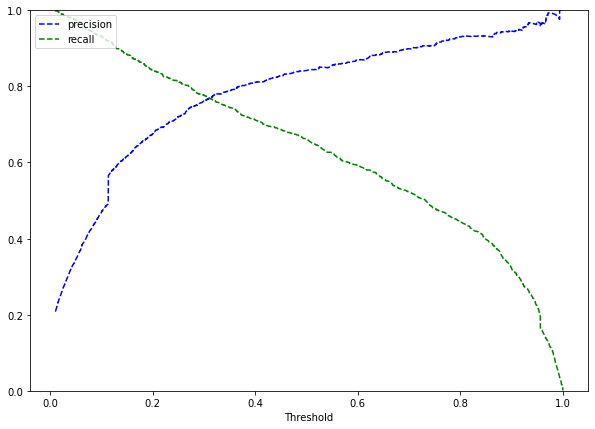

In [47]:
svm_thre = SVC(probability=True)
svm_thre.fit(x_train, y_train)
y_scores_svm = svm_thre.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class

precisions_svm, recalls_svm, thresholds_svm = metrics.precision_recall_curve(y_train, y_scores_svm[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [53]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.31074154817972205


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5949
           1       0.77      0.77      0.77      1139

    accuracy                           0.93      7088
   macro avg       0.86      0.86      0.86      7088
weighted avg       0.93      0.93      0.93      7088



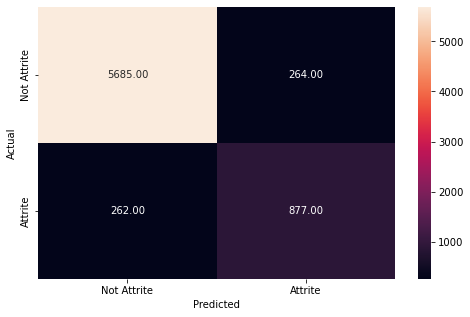

In [54]:
optimal_threshold=0.31
y_pred_train = svm_thre.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2551
           1       0.66      0.71      0.69       488

    accuracy                           0.90      3039
   macro avg       0.80      0.82      0.81      3039
weighted avg       0.90      0.90      0.90      3039



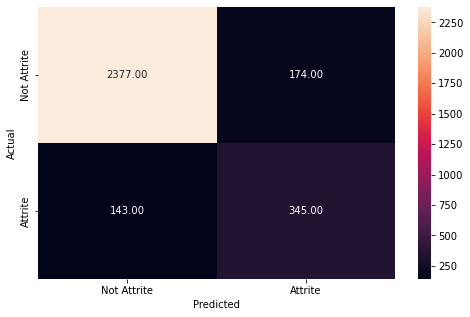

In [55]:
y_pred_test = svm_thre.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

* At the optimal threshold of .31, the model performance has improved significantly. The recall has improved from 0.55 to .75 which is a ~20% increase and the model is giving good generalized results. 
* Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
* As the recall is good, **this model will perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually help in reducing the attrition rate. 

### Decision Tree

In [58]:
x = df1.drop(["Attrition_Flag"], axis=1)
y = df1["Attrition_Flag"]

x = pd.get_dummies(x, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [60]:
dt = DecisionTreeClassifier(random_state=1,max_depth=8)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5949
           1       0.94      0.90      0.92      1139

    accuracy                           0.97      7088
   macro avg       0.96      0.94      0.95      7088
weighted avg       0.97      0.97      0.97      7088



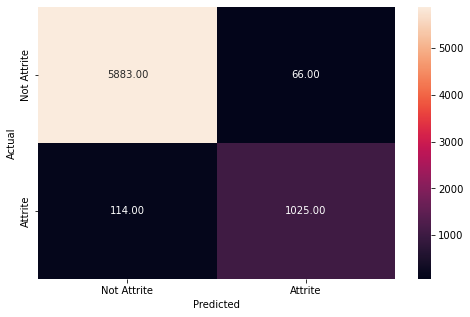

In [61]:
y_pred_train = dt.predict(x_train)
metrics_score(y_train, y_pred_train)

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.86      0.80      0.83       488

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



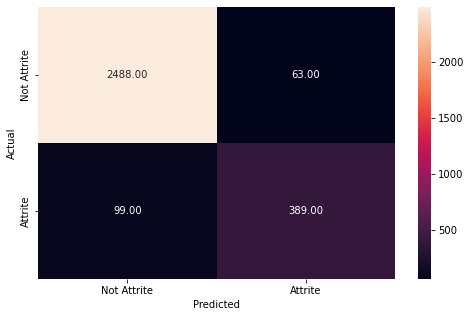

In [62]:
y_pred_test = dt.predict(x_test)
metrics_score(y_test, y_pred_test)

* The decision tree model is slightly overfitting the data here.
* We can tune the hyperparameters to increase the performance and reduce overfitting.

### Decision Tree Visualization

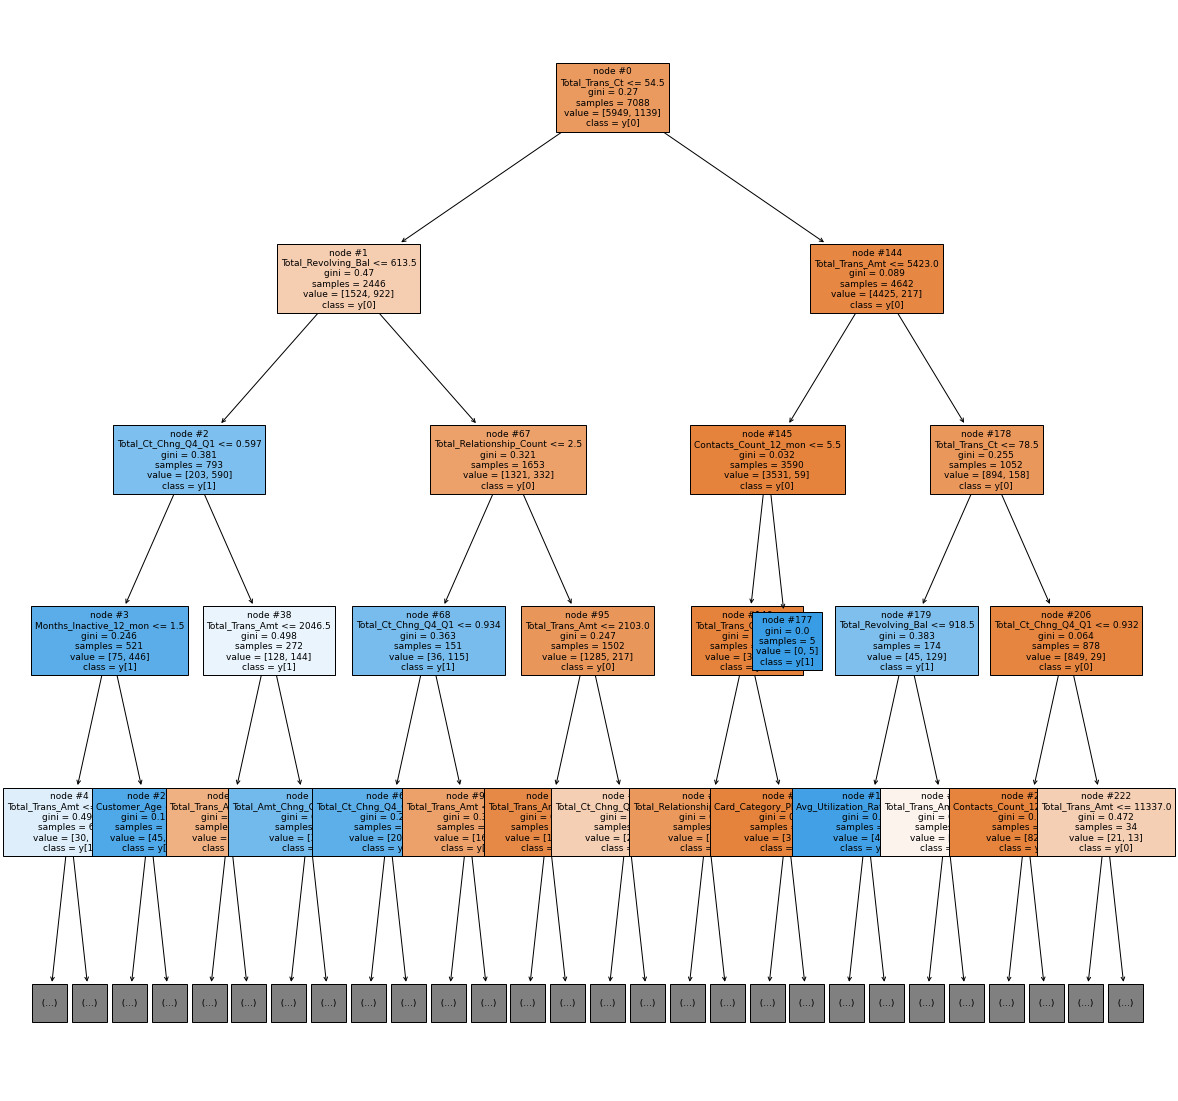

In [63]:
features = list(x.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(dt, feature_names = features, max_depth=4, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

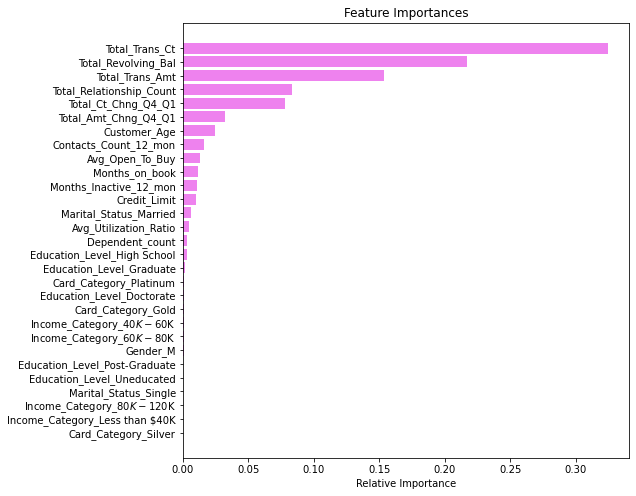

In [67]:
# importance of features in decision tree
feature_names = list(x_train.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- **So,Total_Trans_Ct  is the most important feature** **followed by Total_Revolving_Bal and Total_Trans_Amt** which makes sense.Customers who are doing more transactions with the bank have lower chance of attrition.
- **Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1 are also  important factors** .

## Business Recomendations

* We have been able to build a predictive model:

  a) that bank can deploy this model to identify customers who are at the risk of attrition.
  
  b) that the bank can use to find the key causes that drive attrition. 
  
  c) based on which bank can take appropriate actions to build better retention policies for customers.
  

* Factors that drive the attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
* Total_Trans_Ct: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

* Total_Revolving_Bal: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for feedback on their experience and get to the cause of attrition.

* Total_Trans_Amt: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition - Bank can provide offers on the purchase of costlier items which in turn will benefit the customers and bank both.

* Total_Relationship_Count: Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition - Bank should investigate here to find the problems customers are facing with these products, customer support, or more transparency can help in retaining customers.

* Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less so increasing the credit limit for such customers can profit the bank.

* Months_Inactive: As inactivity increases the attrition also increases, 2-4 months of inactivity are the biggest contributors of attrition -Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

* Highest attrition is among the customers who interacted/reached out the most with/to the bank, This indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.